**Câu 1**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]
# Đọc dữ liệu với phân tách chính xác
train = pd.read_csv('/content/adult.data.csv', names=columns, sep=',\s*', engine='python')
test  = pd.read_csv('/content/adult.test.csv', names=columns, sep=',\s*', engine='python', comment='|')

print  ("Nguyễn Viết Ái Nhi - 6351071054")
print("Số lượng dữ liệu huấn luyện:", len(train))
print("Số lượng dữ liệu kiểm thử:", len(test))


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2519620326.py:16: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv('/content/adult.data.csv', names=columns, sep=',\s*', engine='python')
/tmp/ipython-input-2519620326.py:17: SyntaxWarning: invalid escape sequence '\s'
  test  = pd.read_csv('/content/adult.test.csv', names=columns, sep=',\s*', engine='python', comment='|')


Nguyễn Viết Ái Nhi - 6351071054
Số lượng dữ liệu huấn luyện: 32562
Số lượng dữ liệu kiểm thử: 16282


**Câu 2**

In [ ]:
print ("Nguyễn Viết Ái Nhi - 6351071054")
# Xóa các giá trị '?' và bỏ các dòng bị thiếu dữ liệu
train = train.replace('?', pd.NA).dropna()
test  = test.replace('?', pd.NA).dropna()

# Xóa cột fnlwgt
train = train.drop(columns=['fnlwgt'])

# Cột mục tiêu là cột cuối cùng
train[train.columns[-1]] = train[train.columns[-1]].astype(str).str.strip()
test[test.columns[-1]]   = test[test.columns[-1]].astype(str).str.strip().str.rstrip('.')

# Nối train và test
data = pd.concat([train, test], ignore_index=True)
data.info()

Nguyễn Viết Ái Nhi - 6351071054
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30163 entries, 0 to 30162
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30163 non-null  object
 1   workclass       30163 non-null  object
 2   education       30163 non-null  object
 3   education-num   30163 non-null  object
 4   marital-status  30163 non-null  object
 5   occupation      30163 non-null  object
 6   relationship    30163 non-null  object
 7   race            30163 non-null  object
 8   sex             30163 non-null  object
 9   capital-gain    30163 non-null  object
 10  capital-loss    30163 non-null  object
 11  hours-per-week  30163 non-null  object
 12  native-country  30163 non-null  object
 13  income          30163 non-null  object
 14  fnlwgt          0 non-null      object
dtypes: object(15)
memory usage: 3.5+ MB


**Câu 3**

Nguyễn Viết Ái Nhi - 6351071054


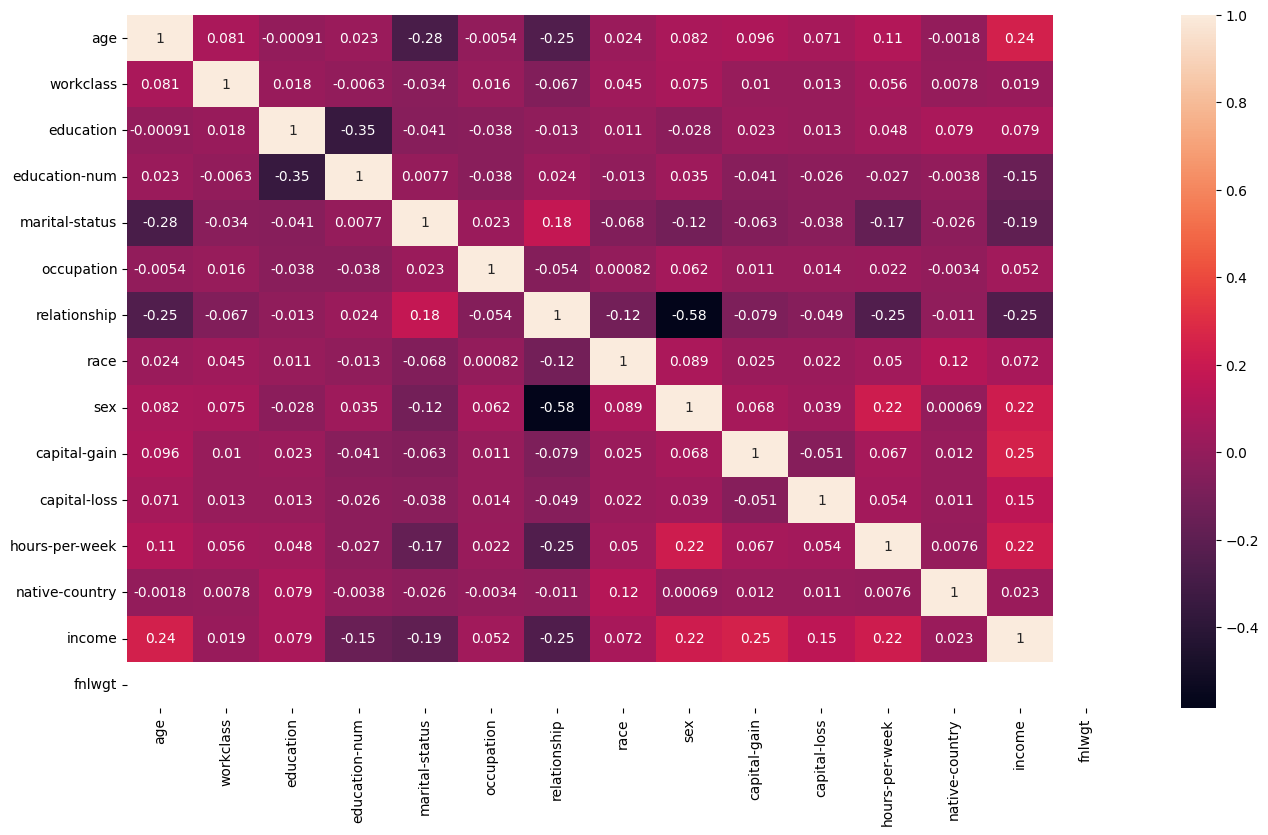

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")

from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

plt.figure(figsize=(16,9))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()



**Câu 4**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
features = data.drop('income', axis=1)
labels = data['income']



Nguyễn Viết Ái Nhi - 6351071054


**Câu 5**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")

# Lấy các cột categorical
categorical_cols = features.select_dtypes(exclude=['int64']).columns

# Hiển thị các cột này
print(categorical_cols)




Nguyễn Viết Ái Nhi - 6351071054
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'fnlwgt'],
      dtype='object')


In [ ]:

print("Nguyễn Viết Ái Nhi - 6351071054")
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot


Nguyễn Viết Ái Nhi - 6351071054


age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
0       False   False   False   False   False   False   False   False   False   
1       False   False   False   False   False   False   False   False   False   
2       False   False   False   False   False   False   False   False   False   
3       False   False   False   False   False   False   False   False   False   
4       False   False   False   False   False   False   False   False   False   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
30158   False   False   False   False   False   False   False   False   False   
30159   False   False   False   False   False   False   False   False   False   
30160   False   False   False   False   False   False   False   False   False   
30161   False   False   False   False   False    True   False   False   False   
30162   False   False   False   False   False   False   False   False   False   

       age_26  ...  native-country_Puerto-Rico  native-country_Scotland  \
0       False  ...                       False                    False   
1       False  ...                       False                    False   
2       False  ...                       False                    False   
3       False  ...                       False                    False   
4       False  ...                       False                    False   
...       ...  ...                         ...                      ...   
30158   False  ...                       False                    False   
30159   False  ...                       False                    False   
30160   False  ...                       False                    False   
30161   False  ...                       False                    False   
30162   False  ...                       False                    False   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
0                     False                  False                    False   
1                     False                  False                    False   
2                     False                  False                    False   
3                     False                  False                    False   
4                     False                  False                    False   
...                     ...                    ...                      ...   
30158                 False                  False                    False   
30159                 False                  False                    False   
30160                 False                  False                    False   
30161                 False                  False                    False   
30162                 False                  False                    False   

       native-country_Trinadad&Tobago  native-country_United-States  \
0                               False                         False   
1                               False                          True   
2                               False                          True   
3                               False                          True   
4                               False                          True   
...                               ...                           ...   
30158                           False                          True   
30159                           False                          True   
30160                           False                          True   
30161                           False                          True   
30162                           False                          True   

       native-country_Vietnam  native-country_Yugoslavia  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False  

**Câu 6**

In [ ]:
X_train = features_onehot[:32562]
X_test = features_onehot[32562:]
y_train = labels[:32562]
y_test = labels[32562:]
print("Nguyễn Viết Ái Nhi - 6351071054")

Nguyễn Viết Ái Nhi - 6351071054


**Câu 7**

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)
print("Nguyễn Viết Ái Nhi - 6351071054")
print(clf.get_params())


Nguyễn Viết Ái Nhi - 6351071054
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
# Giả sử features và labels đã tách
categorical_cols = features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_cols)

# Sau đó chia train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_onehot, labels, test_size=0.25, random_state=0
)

from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Accuracy:", tree_score)
print("Report:\n", metrics.classification_report(y_test, tree_pred))


Nguyễn Viết Ái Nhi - 6351071054
Accuracy: 0.8288025460814216
Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      5703
        >50K       0.66      0.62      0.64      1838

    accuracy                           0.83      7541
   macro avg       0.77      0.76      0.76      7541
weighted avg       0.83      0.83      0.83      7541



Nguyễn Viết Ái Nhi - 6351071054


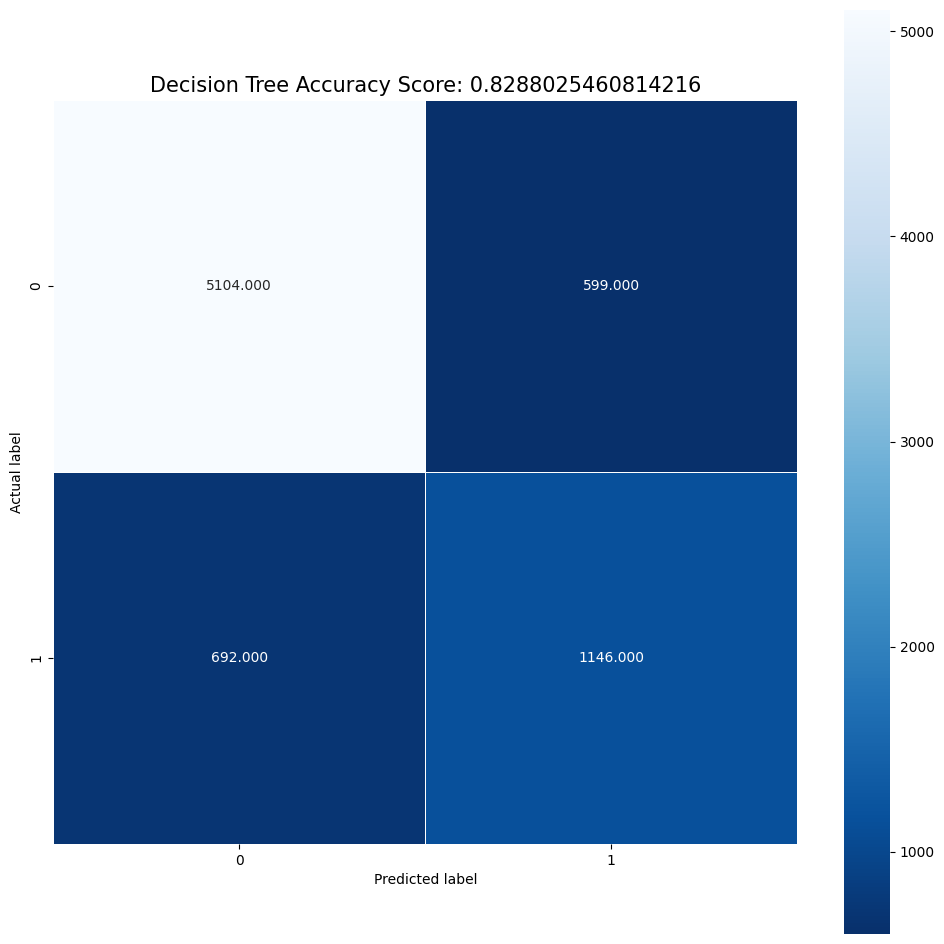

In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
print("Nguyễn Viết Ái Nhi - 6351071054")
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);


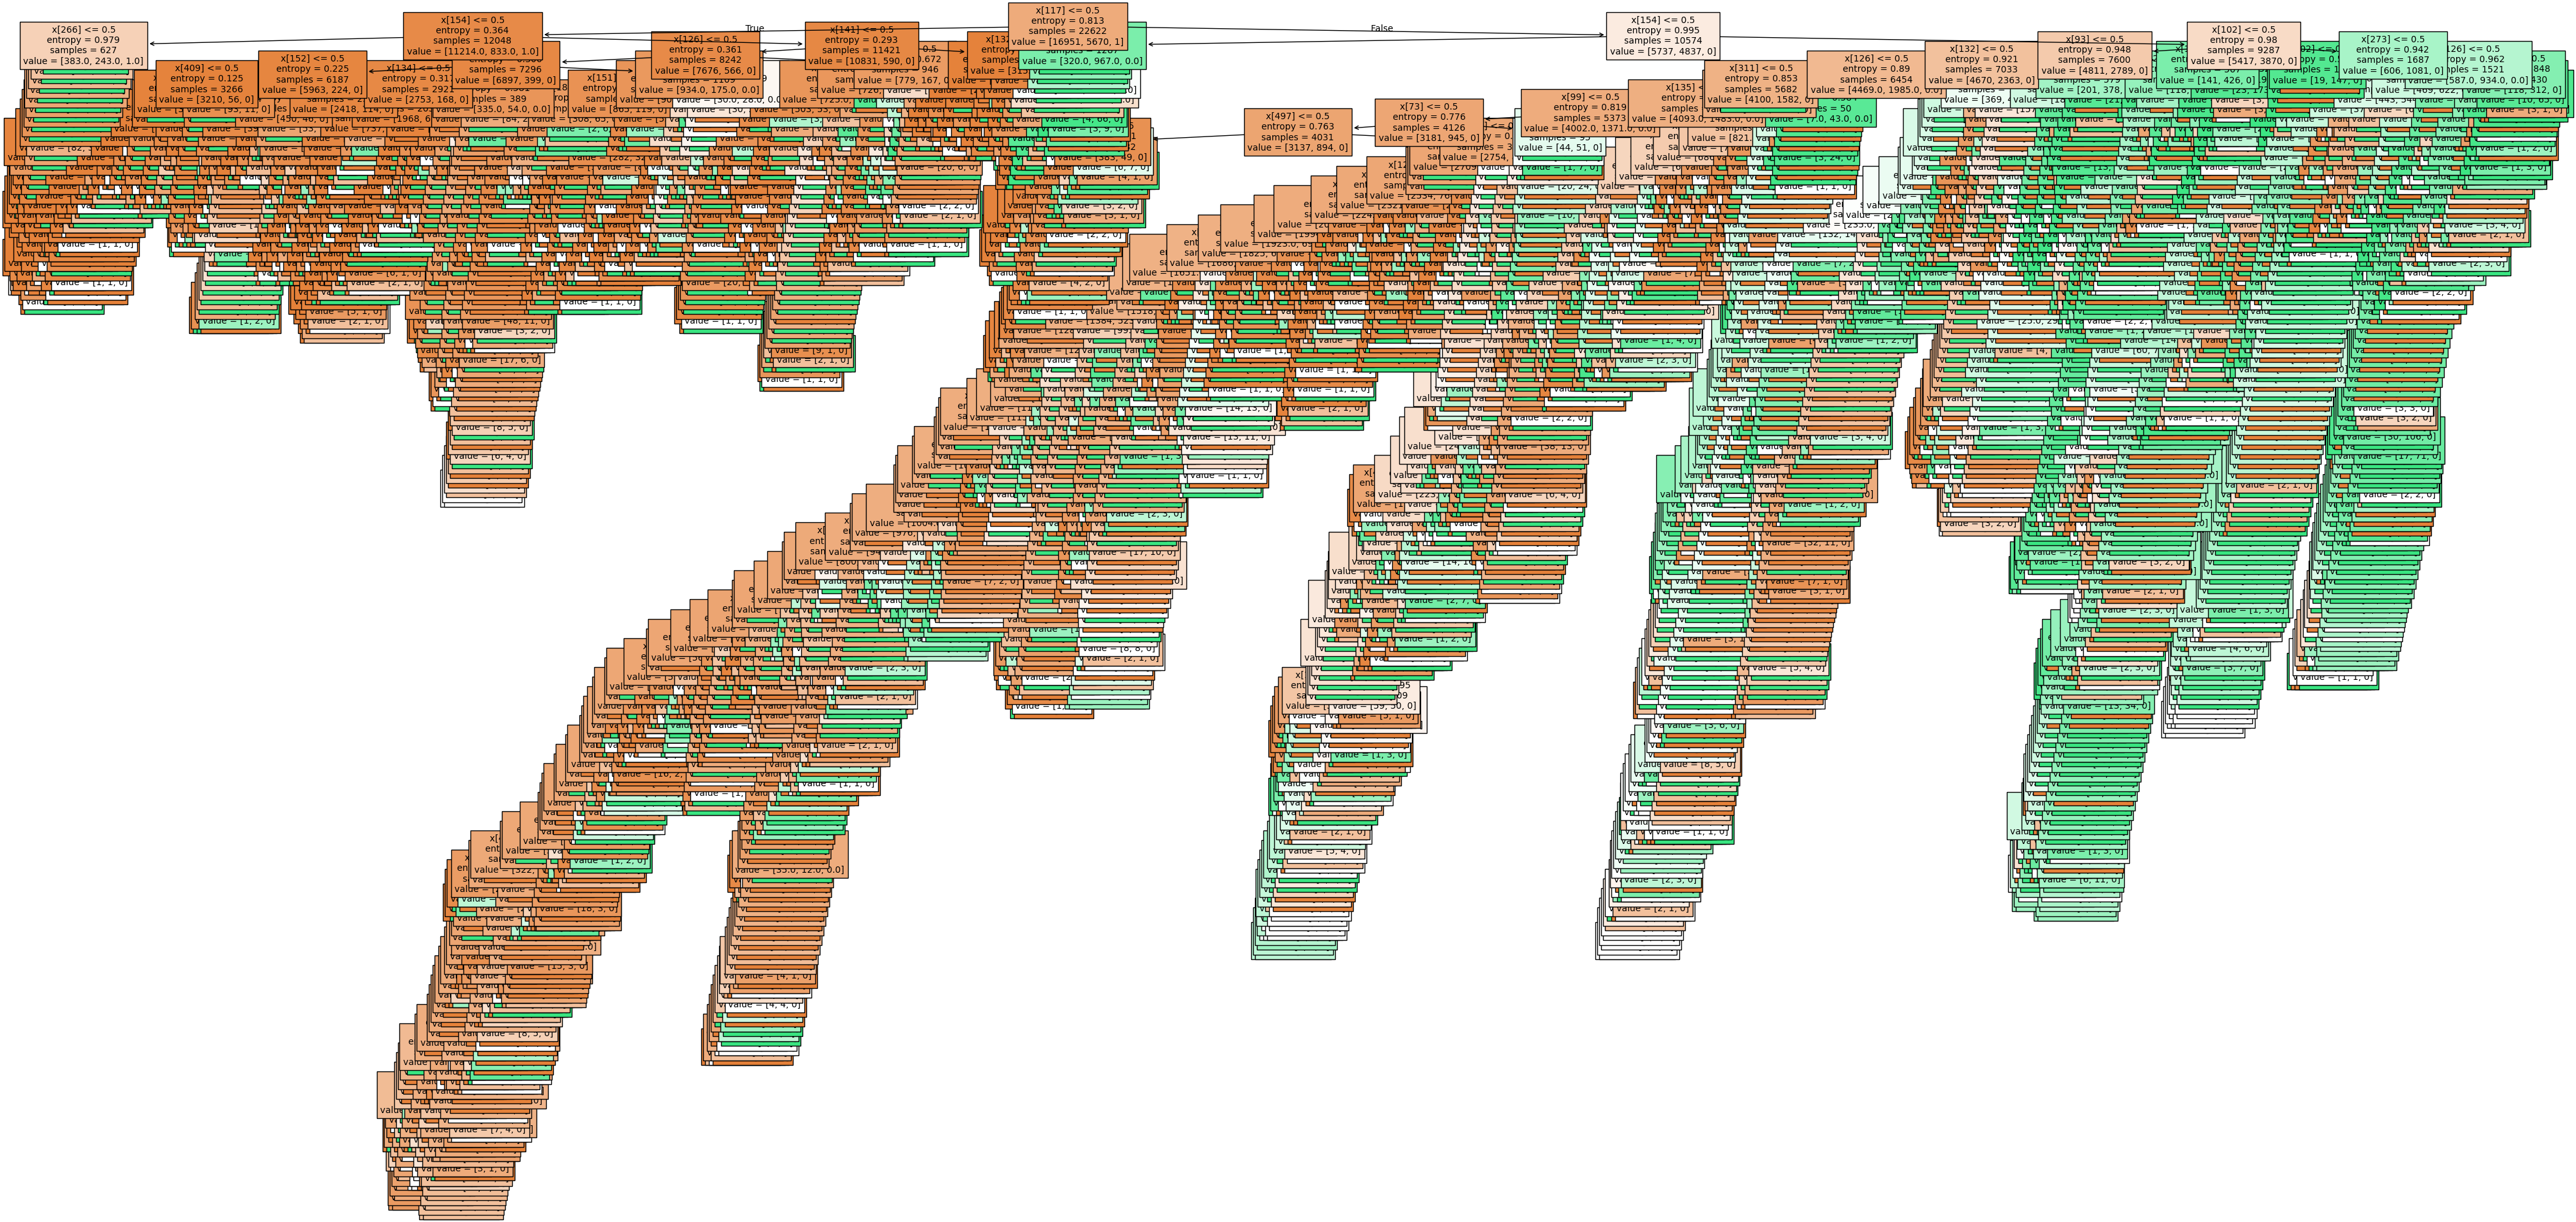

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()
print("Nguyễn Viết Ái Nhi - 6351071054")

**Câu 8**

In [ ]:
from sklearn import tree

# Khởi tạo Decision Tree Classifier (CART) với criterion='gini'
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf.fit(X_train, y_train)

print("Nguyễn Viết Ái Nhi - 6351071054")
print(clf.get_params())


Nguyễn Viết Ái Nhi - 6351071054
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
print("Nguyễn Viết Ái Nhi - 6351071054")
# One-hot hóa các cột categorical
categorical_cols = features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_cols)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    features_onehot, labels, test_size=0.25, random_state=0
)

# Huấn luyện CART
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf.fit(X_train, y_train)

# Dự đoán và đánh giá
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Accuracy:", tree_score)
print("Report:\n", metrics.classification_report(y_test, tree_pred))


Nguyễn Viết Ái Nhi - 6351071054
Accuracy: 0.8238960350086195
Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      5703
        >50K       0.64      0.63      0.64      1838

    accuracy                           0.82      7541
   macro avg       0.76      0.76      0.76      7541
weighted avg       0.82      0.82      0.82      7541



Nguyễn Viết Ái Nhi - 6351071054


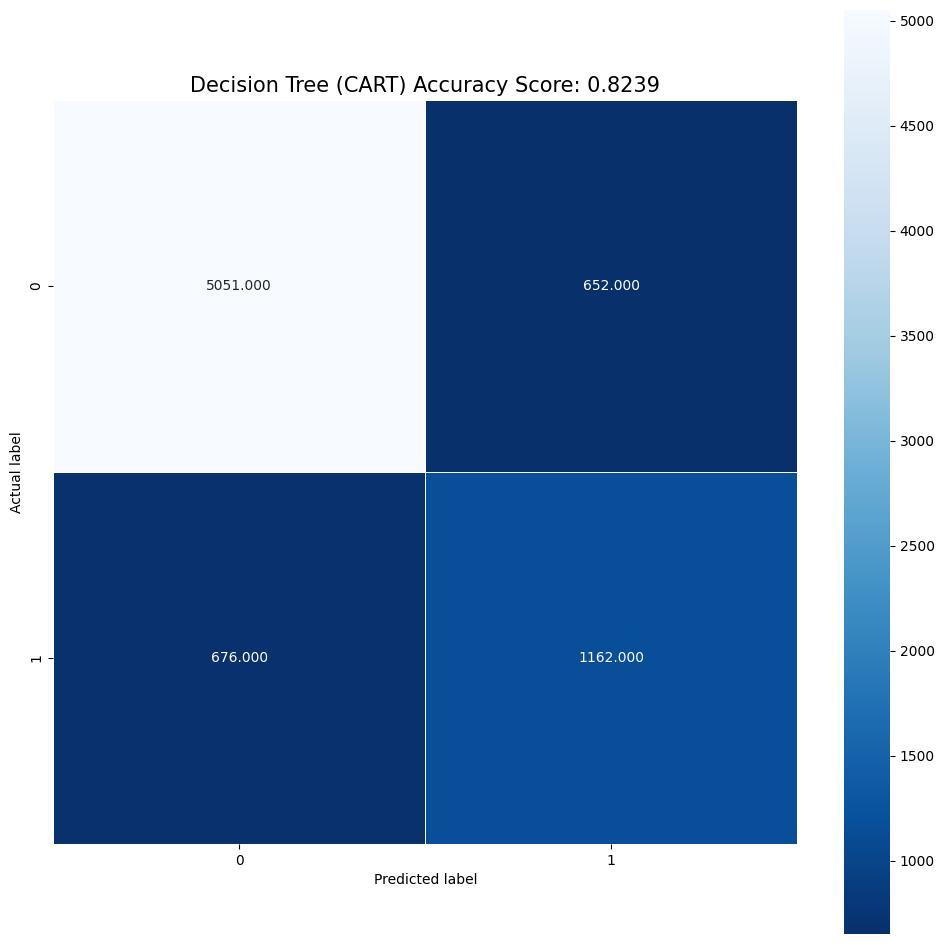

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, tree_pred)
print("Nguyễn Viết Ái Nhi - 6351071054")

plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree (CART) Accuracy Score: {0:.4f}'.format(tree_score)
plt.title(title, size=15)
plt.show()


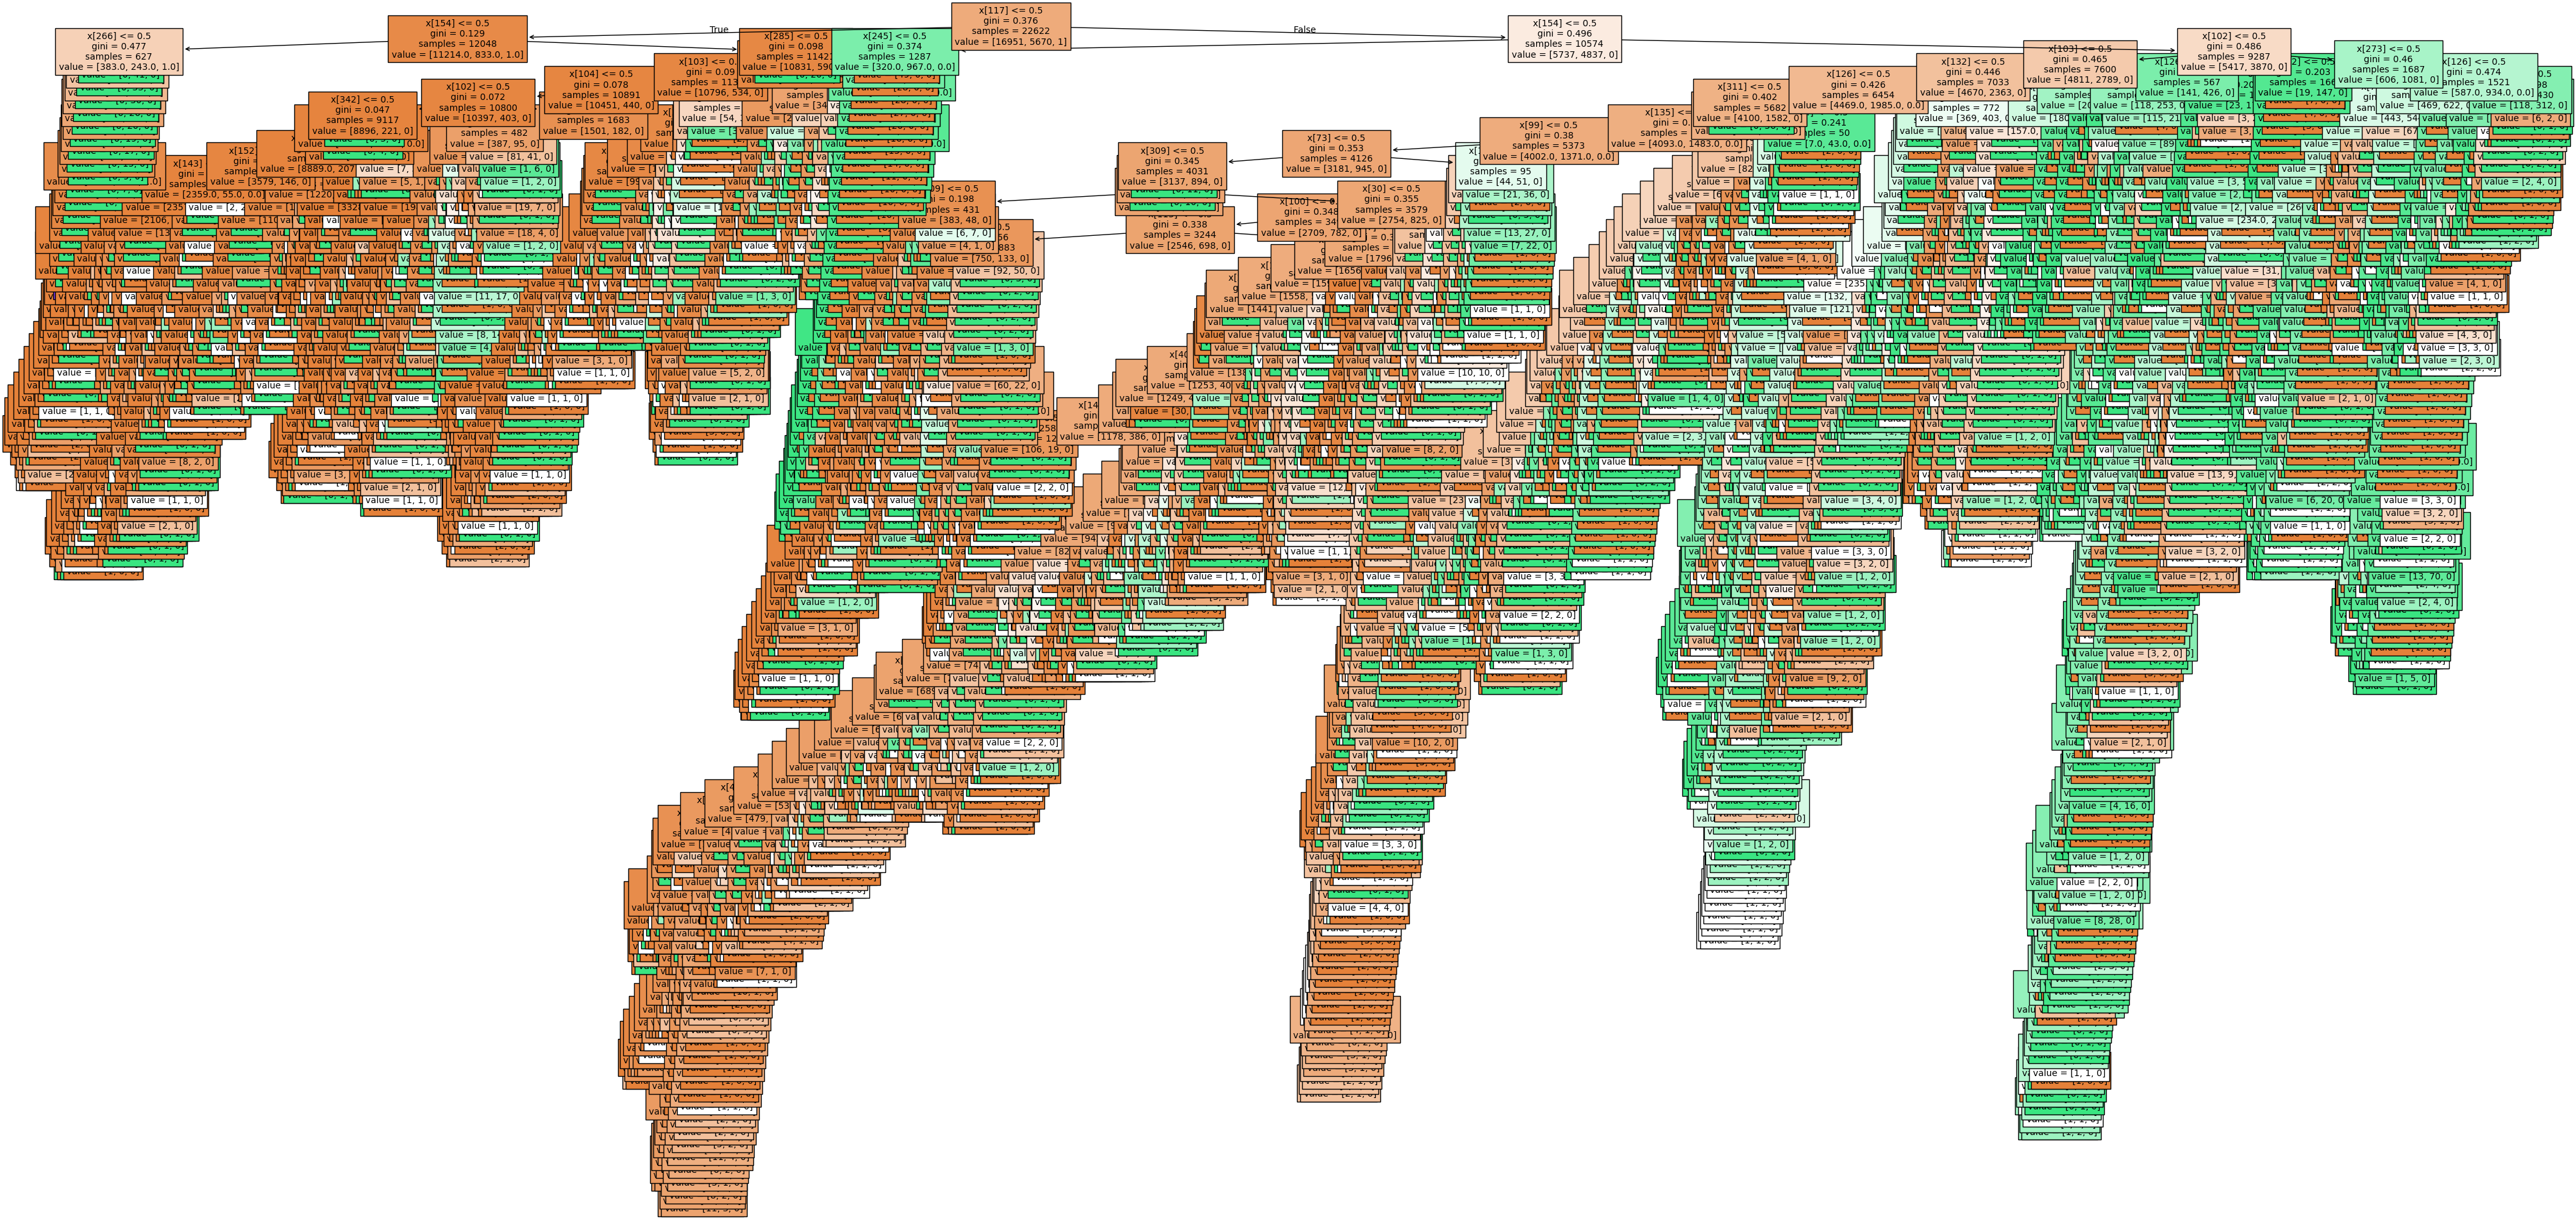

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_cart.png', dpi=100)
plt.show()

print("Nguyễn Viết Ái Nhi - 6351071054")


**Câu 9**

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Nguyễn Viết Ái Nhi - 6351071054")

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))
print("Nguyễn Viết Ái Nhi - 6351071054")

Accuracy: 0.4150643150775759
Report:               precision    recall  f1-score   support

       <=50K       0.98      0.23      0.37      5703
        >50K       0.29      0.98      0.45      1838

    accuracy                           0.42      7541
   macro avg       0.64      0.61      0.41      7541
weighted avg       0.81      0.42      0.39      7541

Nguyễn Viết Ái Nhi - 6351071054


Nguyễn Viết Ái Nhi - 6351071054


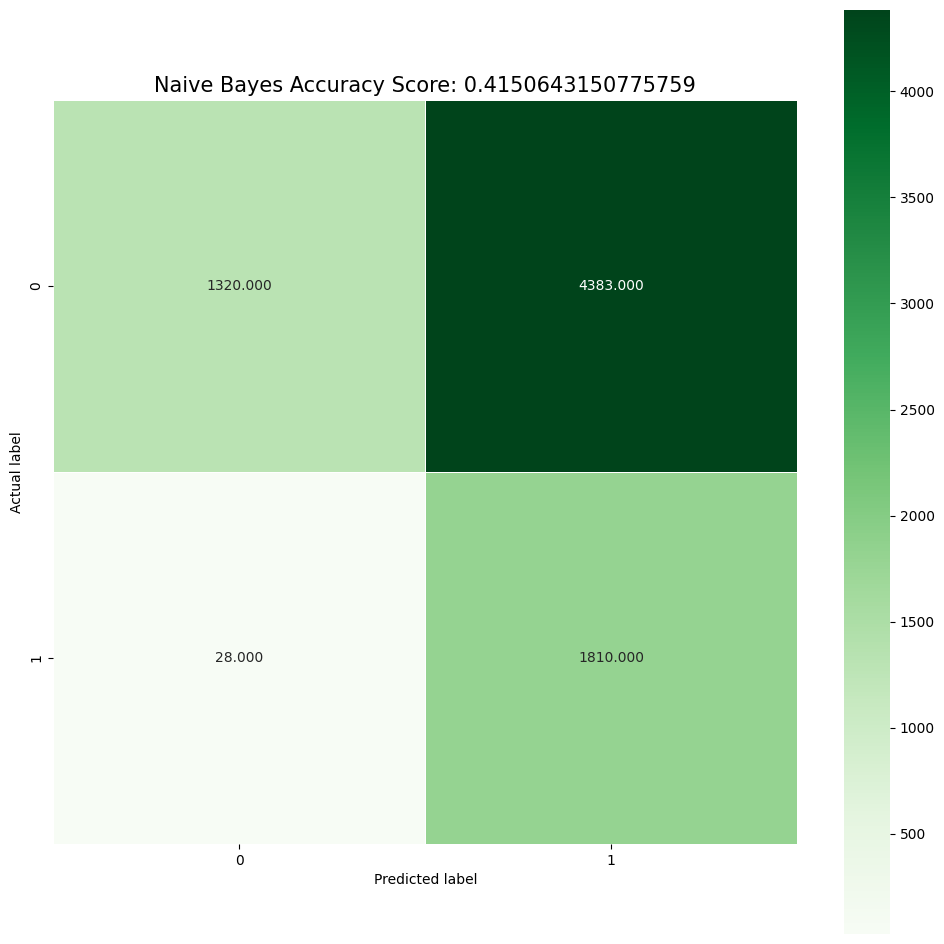

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);
print("Nguyễn Viết Ái Nhi - 6351071054")

**Câu 10**

**ID3, CART**
| Tiêu chí                                    | Kết quả (ID3) | Kết quả (CART) |
| ------------------------------------------- | ------------------------------------- | ------------------------------------- |
| Accuracy Score                              | 0.8239                                | 0.8288                                |
| True Negative (TN) - Lớp 0                  | 5051                                  | 5104                                  |
| True Positive (TP) - Lớp 1                  | 1162                                  | 1146                                  |
| False Negative (FN) - Lớp 1 bị nhầm thành 0 | 676                                   | 692                                   |
| False Positive (FP) - Lớp 0 bị nhầm thành 1 | 652                                   | 599                                   |

**Nhận xét:**

* Mô hình Decision Tree đạt được độ chính xác rất tốt, khoảng 82.39% - 82.88%.
* Hiệu suất phân loại lớp 0 (Thu nhập thấp, <=50K) là mạnh: Mô hình dự đoán đúng phần lớn các trường hợp thu nhập thấp (TN cao).
* Tuy nhiên, mô hình vẫn có một số lượng đáng kể False Negative (676 - 692 trường hợp thực tế thu nhập cao (Lớp 1) bị dự đoán sai là thu nhập thấp (Lớp 0)). Điều này chỉ ra rằng mô hình khó khăn hơn trong việc nhận diện những người có thu nhập cao.

**VAVIES BAYES**

| Tiêu chí                                    | Kết quả (Từ Ma trận) |
| ------------------------------------------- | -------------------- |
| Accuracy Score                              | 0.4150 (41.50%)      |
| True Negative (TN) - Lớp 0                  | 1320                 |
| True Positive (TP) - Lớp 1                  | 1810                 |
| False Negative (FN) - Lớp 1 bị nhầm thành 0 | 28                   |
| False Positive (FP) - Lớp 0 bị nhầm thành 1 | 4383                 |

**Nhận xét:**

* Mô hình Naive Bayes có độ chính xác rất thấp, chỉ khoảng 41.50%.
* Mô hình này thể hiện sự thiên vị cực lớn về việc dự đoán Lớp 1 (Thu nhập cao), bằng chứng là số lượng False Positive (FP = 4383) là cực kỳ cao. Tức là, mô hình đã dự đoán sai hơn 4000 trường hợp có thu nhập thấp thành thu nhập cao.
* Mặt khác, số lượng False Negative (FN = 28) cực kỳ thấp, cho thấy mô hình hiếm khi bỏ sót một người có thu nhập cao, nhưng lại đổi lấy việc dự đoán sai rất nhiều người thu nhập thấp.